<a href="https://colab.research.google.com/github/dianaquinterol/MujeresDigitales/blob/main/ProyectoNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sfm
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols

In [20]:
df= pd.read_csv("pbp-2021.csv")

In [21]:
df.describe

<bound method NDFrame.describe of            GameId    GameDate  Quarter  ...  IsNoPlay  PenaltyType PenaltyYards
0      2021103112  2021-10-31        3  ...         0          NaN            0
1      2021103112  2021-10-31        3  ...         0          NaN            0
2      2021103112  2021-10-31        3  ...         0          NaN            0
3      2021103112  2021-10-31        3  ...         0          NaN            0
4      2021103112  2021-10-31        3  ...         0          NaN            0
...           ...         ...      ...  ...       ...          ...          ...
21878  2021091204  2021-09-12        4  ...         0          NaN            0
21879  2021091202  2021-09-12        1  ...         0          NaN            0
21880  2021090900  2021-09-09        3  ...         0          NaN            0
21881  2021090900  2021-09-09        2  ...         0          NaN            0
21882  2021090900  2021-09-09        1  ...         0          NaN            0

[2188

In [22]:
df.shape

(21883, 45)

In [23]:
df["GameId"].unique().shape

(122,)

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21883 entries, 0 to 21882
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          21883 non-null  int64  
 1   GameDate                        21883 non-null  object 
 2   Quarter                         21883 non-null  int64  
 3   Minute                          21883 non-null  int64  
 4   Second                          21883 non-null  int64  
 5   OffenseTeam                     19965 non-null  object 
 6   DefenseTeam                     19965 non-null  object 
 7   Down                            21883 non-null  int64  
 8   ToGo                            21883 non-null  int64  
 9   YardLine                        21883 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 21883 non-null  int64  
 12  Unnamed: 12                     

In [25]:
df["OffenseTeam"].unique()

array(['MIN', 'DAL', nan, 'KC', 'NYG', 'JAX', 'SEA', 'NE', 'LAC', 'NO',
       'CIN', 'NYJ', 'WAS', 'DEN', 'TB', 'LA', 'HOU', 'PIT', 'CLE', 'IND',
       'TEN', 'DET', 'PHI', 'MIA', 'SF', 'BUF', 'CHI', 'GB', 'ARI', 'LV',
       'CAR', 'ATL', 'BAL'], dtype=object)

In [26]:
df["DefenseTeam"].unique()

array(['DAL', 'MIN', nan, 'NYG', 'KC', 'SEA', 'JAX', 'LAC', 'NE', 'TB',
       'NYJ', 'CIN', 'DEN', 'WAS', 'NO', 'HOU', 'LA', 'CLE', 'PIT', 'TEN',
       'IND', 'PHI', 'DET', 'BUF', 'CHI', 'MIA', 'SF', 'ARI', 'GB', 'LV',
       'ATL', 'CAR', 'BAL'], dtype=object)

In [27]:
game=df.iloc[ :, [0,1,5,6,14,21,25,36,42]]
game

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
0,2021103112,2021-10-31,MIN,DAL,"(6:36) 1-G.JOSEPH 40 YARD FIELD GOAL IS GOOD, ...",FIELD GOAL,0,0,0
1,2021103112,2021-10-31,MIN,DAL,(7:18) (SHOTGUN) 8-K.COUSINS PASS SHORT RIGHT ...,PASS,0,0,0
2,2021103112,2021-10-31,MIN,DAL,(7:23) 8-K.COUSINS PASS INCOMPLETE DEEP RIGHT ...,PASS,0,0,0
3,2021103112,2021-10-31,MIN,DAL,(7:59) 33-D.COOK RIGHT TACKLE TO DAL 29 FOR -2...,RUSH,0,0,0
4,2021103112,2021-10-31,MIN,DAL,(8:29) 8-K.COUSINS PASS SHORT RIGHT TO 89-C.HE...,PASS,0,0,0
...,...,...,...,...,...,...,...,...,...
21878,2021091204,2021-09-12,NaN,NaN,TIMEOUT #2 BY DET AT 00:58.,TIMEOUT,0,0,0
21879,2021091202,2021-09-12,NaN,NaN,END QUARTER 1,NaN,0,0,0
21880,2021090900,2021-09-09,NaN,NaN,END QUARTER 3,NaN,0,0,0
21881,2021090900,2021-09-09,NaN,NaN,END QUARTER 2,NaN,0,0,0


In [28]:
game[(game["PlayType"]=="FIELD GOAL") & (game["Description"].str.contains("IS GOOD"))].replace("FIELD GOAL","3")

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
0,2021103112,2021-10-31,MIN,DAL,"(6:36) 1-G.JOSEPH 40 YARD FIELD GOAL IS GOOD, ...",3,0,0,0
12,2021110100,2021-11-01,KC,NYG,"(1:12) 7-H.BUTKER 34 YARD FIELD GOAL IS GOOD, ...",3,0,0,0
17,2021110100,2021-11-01,KC,NYG,"(8:56) 7-H.BUTKER 36 YARD FIELD GOAL IS GOOD, ...",3,0,0,0
65,2021103112,2021-10-31,MIN,DAL,"(2:54) 1-G.JOSEPH 24 YARD FIELD GOAL IS GOOD, ...",3,0,0,0
75,2021103112,2021-10-31,DAL,MIN,"(:08) 2-G.ZUERLEIN 39 YARD FIELD GOAL IS GOOD,...",3,0,0,0
...,...,...,...,...,...,...,...,...,...
10535,2021091200,2021-09-12,ATL,PHI,"(10:02) 7-Y.KOO 21 YARD FIELD GOAL IS GOOD, CE...",3,0,0,0
10551,2021090900,2021-09-09,TB,DAL,"(:07) 3-R.SUCCOP 36 YARD FIELD GOAL IS GOOD, C...",3,0,0,0
10558,2021090900,2021-09-09,DAL,TB,(1:29) 2-G.ZUERLEIN 48 YARD FIELD GOAL IS GOOD...,3,0,0,0
17556,2021101012,2021-10-10,DAL,NYG,(2:05) 2-G.ZUERLEIN 38 YARD FIELD GOAL IS GOOD...,3,0,0,0


In [35]:
[(game["IsTouchdown"] == 1 ) & (game["IsNoPlay"]== 0)].replace(1, 6)


,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
27,2021110100,2021-11-01,NYG,KC,(14:57) (SHOTGUN) 8-D.JONES PASS SHORT RIGHT T...,PASS,6,0,0
55,2021103112,2021-10-31,DAL,MIN,(:55) (SHOTGUN) 10-C.RUSH PASS SHORT LEFT TO 1...,PASS,6,0,0
95,2021103109,2021-10-31,SEA,JAX,"(4:22) 7-G.SMITH UP THE MIDDLE FOR 1 YARD, TOU...",RUSH,6,0,0
119,2021103108,2021-10-31,LAC,NE,(:47) (SHOTGUN) 10-J.HERBERT PASS DEEP RIGHT T...,PASS,6,0,0
148,2021103108,2021-10-31,NE,LAC,(10:51) 37-D.HARRIS UP THE MIDDLE FOR 28 YARDS...,RUSH,6,0,0
...,...,...,...,...,...,...,...,...,...
21566,2021103112,2021-10-31,DAL,MIN,(14:18) (SHOTGUN) 10-C.RUSH PASS DEEP MIDDLE T...,PASS,6,0,0
21653,2021101707,2021-10-17,KC,WAS,(14:08) 31-DA.WILLIAMS UP THE MIDDLE FOR 3 YAR...,RUSH,6,0,0
21671,2021101706,2021-10-17,NYG,LA,(6:27) (NO HUDDLE) 39-E.PENNY UP THE MIDDLE FO...,RUSH,6,0,0
21715,2021101009,2021-10-10,CLE,LAC,"(4:51) 27-K.HUNT RIGHT END FOR 8 YARDS, TOUCHD...",RUSH,6,0,0


In [30]:
game[game["IsTwoPointConversionSuccessful"] == 1].replace(1, 2)


,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
132,2021103108,2021-10-31,NE,LAC,TWO-POINT CONVERSION ATTEMPT. 10-M.JONES PASS ...,TWO-POINT CONVERSION,0,2,0
350,2021103105,2021-10-31,HOU,LA,TWO-POINT CONVERSION ATTEMPT. 10-D.MILLS RUSHE...,TWO-POINT CONVERSION,0,2,0
385,2021103107,2021-10-31,NYJ,CIN,TWO-POINT CONVERSION ATTEMPT. 82-J.CROWDER PAS...,TWO-POINT CONVERSION,0,2,0
763,2021103103,2021-10-31,PIT,CLE,TWO-POINT CONVERSION ATTEMPT. 7-B.ROETHLISBERG...,TWO-POINT CONVERSION,0,2,2
832,2021103101,2021-10-31,MIA,BUF,TWO-POINT CONVERSION ATTEMPT. 1-T.TAGOVAILOA P...,TWO-POINT CONVERSION,0,2,0
1159,2021103102,2021-10-31,SF,CHI,TWO-POINT CONVERSION ATTEMPT. 10-J.GAROPPOLO P...,TWO-POINT CONVERSION,0,2,0
1679,2021102406,2021-10-24,LA,DET,TWO-POINT CONVERSION ATTEMPT. 9-M.STAFFORD PAS...,TWO-POINT CONVERSION,0,2,0
2202,2021102407,2021-10-24,PHI,LV,TWO-POINT CONVERSION ATTEMPT. 1-J.HURTS PASS T...,TWO-POINT CONVERSION,0,2,0
2421,2021101800,2021-10-18,BUF,TEN,(PASS FORMATION) TWO-POINT CONVERSION ATTEMPT....,TWO-POINT CONVERSION,0,2,0
2583,2021101710,2021-10-17,NE,DAL,TWO-POINT CONVERSION ATTEMPT. 10-M.JONES PASS ...,TWO-POINT CONVERSION,0,2,0


In [31]:
game.head(28)

,GameId,GameDate,OffenseTeam,DefenseTeam,Description,PlayType,IsTouchdown,IsTwoPointConversionSuccessful,IsNoPlay
0,2021103112,2021-10-31,MIN,DAL,"(6:36) 1-G.JOSEPH 40 YARD FIELD GOAL IS GOOD, ...",FIELD GOAL,0,0,0
1,2021103112,2021-10-31,MIN,DAL,(7:18) (SHOTGUN) 8-K.COUSINS PASS SHORT RIGHT ...,PASS,0,0,0
2,2021103112,2021-10-31,MIN,DAL,(7:23) 8-K.COUSINS PASS INCOMPLETE DEEP RIGHT ...,PASS,0,0,0
3,2021103112,2021-10-31,MIN,DAL,(7:59) 33-D.COOK RIGHT TACKLE TO DAL 29 FOR -2...,RUSH,0,0,0
4,2021103112,2021-10-31,MIN,DAL,(8:29) 8-K.COUSINS PASS SHORT RIGHT TO 89-C.HE...,PASS,0,0,0
5,2021103112,2021-10-31,MIN,DAL,(9:01) 33-D.COOK RIGHT GUARD TO DAL 34 FOR 3 Y...,RUSH,0,0,0
6,2021103112,2021-10-31,MIN,DAL,(11:54) (SHOTGUN) 8-K.COUSINS SACKED AT MIN 46...,SACK,0,0,0
7,2021103112,2021-10-31,DAL,MIN,"2-G.ZUERLEIN EXTRA POINT IS GOOD, CENTER-44-J....",EXTRA POINT,0,0,0
8,2021103112,2021-10-31,NaN,NaN,END QUARTER 2,NaN,0,0,0
9,2021103112,2021-10-31,NaN,NaN,TIMEOUT #2 BY MIN AT 00:43.,TIMEOUT,0,0,0


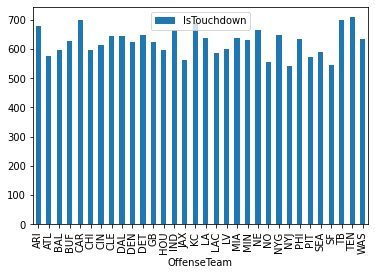

In [32]:
game.groupby("OffenseTeam")["IsTouchdown"].count().plot(kind='bar', legend='Reverse')



In [33]:
game.groupby("OffenseTeam")["IsTouchdown"].count()

OffenseTeam
ARI    680
ATL    575
BAL    596
BUF    628
CAR    698
CHI    597
CIN    613
CLE    644
DAL    645
DEN    625
DET    646
GB     623
HOU    598
IND    664
JAX    562
KC     690
LA     638
LAC    586
LV     600
MIA    636
MIN    629
NE     664
NO     556
NYG    648
NYJ    540
PHI    635
PIT    573
SEA    588
SF     545
TB     699
TEN    709
WAS    635
Name: IsTouchdown, dtype: int64

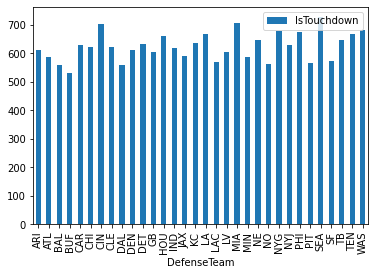

In [34]:
game.groupby("DefenseTeam")["IsTouchdown"].count().plot(kind='bar', legend='Reverse')